# Input your data here

In [56]:
input = "Happy"

In [57]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install -U scikit-learn
# %pip install spotipy

In [58]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("data/tracks.csv")

# Creating the dataframe
df = pd.DataFrame(dataset)

df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [59]:
# Spotify API Authentication Information
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#weilin's api key
client_id = '80e8701040fd4ee99393dbe0038161fb'
client_secret = 'e5b3e975af1a4ed8adac362bddbe98f3'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [60]:
# Creating a new feature that comprises of Song Name and Artist.
df["song_name_artist"] = df["name"] + df["artists"]

In [61]:
df['year'] = df['release_date'].str.extract(r'(\d{4})').astype(int)

In [62]:
# Removing all duplicate songs-artist pairs. Meaning that there won't be 2 of the same song sung by the same artist.
print(df.shape)
df.drop_duplicates(subset=["song_name_artist"], keep='first', inplace=True)
print(df.shape)

(586672, 22)
(526610, 22)


In [63]:
# Filter data to keep songs published 2000* and later.
df = df[df["year"] >= 2000]
print(df.shape)

(187472, 22)


In [64]:
df_fill_null = df.copy()

df_fill_null['name'] = df.apply(
    lambda row: sp.track(f"spotify:track:{row['id']}")['name'] if pd.isnull(row['name']) else row['name'], axis=1
)

In [65]:
# df_fill_null = df.copy()
df_fill_null['first_artist'] = df_fill_null.apply(
    lambda row: row['artists'][1:-1].split(',')[0][1:-1], axis=1
)

In [66]:
df_fill_null['first_id_artists'] = df_fill_null.apply(
    lambda row: row['id_artists'][1:-1].split(',')[0][1:-1], axis=1
)
df_fill_null.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,song_name_artist,year,first_artist,first_id_artists
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,...,0.394,0.000000,0.149,0.285,113.564,3,You'll Never Walk Alone - Mono; 2002 Remaster[...,2008,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,0.436,0.000000,0.139,0.839,120.689,4,A Lover's Concerto['The Toys'],2020,The Toys,6lH5PpuiMa5SpfjoIOlwCS
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,...,0.255,0.000005,0.163,0.588,104.536,4,Ferry Cross the Mersey - Mono; 2002 Remaster['...,2008,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,...,0.406,0.000000,0.122,0.478,106.773,4,Don't Let the Sun Catch You Crying (Main) - Mo...,2008,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,...,0.887,0.000000,0.904,0.239,117.153,3,The September Of My Years - Live At The Sands ...,2018,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0


In [11]:
# Where the genre part will go.

# # The effective solution:
# def get_artist_genres(artist_name):
#     # Get track information
#     artist_info = sp.search(q=artist_name, type='artist')
#     # Extract song name
#     genres = artist_info['artists']['items'][0]['genres']

#     return genres # As an array

# # Sample size:
# test = df_fill_null.iloc[1900:1910]
# print(get_artist_genres(test['first_artist']))

# test['genres'] = test['first_artist'].apply(
#     lambda x: get_artist_genres(x)) # Appending each row with its respective genre.
# test.iloc[1000]

# Here's the issue: Each row takes 0.7 seconds to process. Shorter duration if processed before, and is cached locally.
# So far, we have est. 188,000 rows of data.
# Thus, it will take a total of 131,600 seconds to fully populate the dataset with genres.
# That's 2,193.34 minutes, or 36 and a half hours.

# The to-do: reduce time dimensionaltiy, or find an alternative source.

# Index 1901 cannot be found on spotify for some reason and is creating issues with obtaining data.

In [30]:
# import threading

# # Improved workaround Multi Threading
# # API Pull function
# def get_artist_genres(artist_name):
#     # Get track information
#     artist_info = sp.search(q=artist_name, type='artist') # API Search
#     items = artist_info.get('artists', {}).get('items', []) # Specific information pull
#     # Error checking to ensure that the data structure is as expected before trying to access its elements
#     # Used to bypass the error from above
#     if items:
#         genres = items[0].get('genres', [])
#         return genres
#     else:
#         print(f"No artist found for {artist_name}")
#         return []

# # Threaded function/service that calls the API Pull function for each row in DataFrame
# def process_data(data):
#     # Function to process data
#     genres_list = []
#     for artist_name in data['first_artist']:
#         genres_list.append(get_artist_genres(artist_name))
#     return genres_list

# # DataFrame splitting for Parallel Processing (Multi Threading)
# def split_data(data, num_threads=4):
#     # Define worker function
#     def worker(chunk, result, start_index):
#         for i, artist_name in enumerate(chunk['first_artist']):
#             result[start_index + i] = get_artist_genres(artist_name)

#     # Split the data into chunks
#     chunk_size = len(data) // num_threads
#     chunks = [data.iloc[i:i+chunk_size] for i in range(0, len(data), chunk_size)]

#     # Create threads to process chunks
#     threads = []
#     results = [[] for _ in range(len(data))]
#     for i in range(num_threads):
#         start_index = i * chunk_size
#         thread = threading.Thread(target=worker, args=(chunks[i], results, start_index))
#         threads.append(thread)
#         thread.start()

#     # Wait for all threads to complete
#     for thread in threads:
#         thread.join()

#     return results

# # Example usage with pandas DataFrame
# data = df_fill_null.iloc[100000:100100]

# combined_result = split_data(data)
# print(combined_result)

[['merengue tipico', 'salsa', 'tropical'], ['classic italian pop', 'italian adult pop'], ['chicha', 'cumbia chilena', 'cumbia villera'], ['classic colombian pop', 'cumbia', 'musica popular colombiana', 'tropical'], ['latin pop', 'rock en espanol', 'trova'], ['musica andina', 'musica indigena latinoamericana', 'musica otavalena'], ['ecuadorian alternative rock'], ['ecuadorian pop'], ['ecuadorian pop'], ['ecuadorian pop'], ['ecuadorian alternative rock', 'ecuadorian indie'], [], ['ecuadorian pop'], [], ['ecuadorian pop'], [], [], ['argentine rock', 'latin alternative', 'latin rock', 'ska argentino'], ['ecuadorian pop'], ['ecuadorian alternative rock', 'ecuadorian indie'], ['new york drill'], ['ecuadorian pop'], ['ecuadorian pop'], ['argentine heavy metal', 'argentine metal', 'latin metal'], ['ecuadorian pop'], ['ecuadorian alternative rock', 'ecuadorian indie'], ['ecuadorian alternative rock', 'ecuadorian indie'], ['bolero', 'folklore ecuatoriano', 'musica popular colombiana'], ['reggaet

In [31]:
# Appends the genre list generated as a 'genre' column in the DataFrame
# data['genres'] = combined_result
# data.tail()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_1624\2475138904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = combined_result


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,song_name_artist,year,first_artist,genres
359681,15Tafw77Zq3plg7iTkStFT,El Baile del Pimpollo,32,236213,0,['Sharon La Hechicera'],['1QFcx7yQUPxN3WKycKZK4t'],2004-06-01,0.857,0.749,...,0.00885,0.000081,0.0259,0.962,94.970,4,El Baile del Pimpollo['Sharon La Hechicera'],2004,Sharon La Hechicera,[cumbia ecuatoriana]
359682,4HiH9dRLSYC83IEiLRujYS,Pecado,32,220747,0,['Sharon La Hechicera'],['1QFcx7yQUPxN3WKycKZK4t'],2004-06-01,0.829,0.772,...,0.19000,0.000263,0.0350,0.962,109.036,4,Pecado['Sharon La Hechicera'],2004,Sharon La Hechicera,[cumbia ecuatoriana]
359683,5LU8lV9tUJ5X9nlion9Hal,Una Palomita,34,195640,0,['Magia Latina'],['3wOgClqWjZqIvaAQYY8BNv'],2004-09-14,0.719,0.670,...,0.02750,0.007820,0.1000,0.962,133.939,4,Una Palomita['Magia Latina'],2004,Magia Latina,[cumbia ecuatoriana]
359684,0lAnLj5guELcQx9cfk5908,Ay Pobre Amor,33,193840,0,['Jaime Enrique Aymara'],['08quUjVl9cVNFqAacTIiCp'],2004-12-10,0.810,0.566,...,0.00549,0.000067,0.0800,0.945,113.881,4,Ay Pobre Amor['Jaime Enrique Aymara'],2004,Jaime Enrique Aymara,[cumbia ecuatoriana]
359685,4WrS8ipVxV1F2lL2dTvarn,La Otra Mosita,32,245693,0,['Grupo Deseo'],['36vHNiFmp6YK2J8aXi4eXZ'],2004-09-14,0.849,0.547,...,0.40400,0.774000,0.0470,0.946,109.987,4,La Otra Mosita['Grupo Deseo'],2004,Grupo Deseo,[cumbia ecuatoriana]


In [69]:
# Removing rows without song name.
df_removed = df_fill_null.dropna()
df_removed.isnull().sum()
df_removed.count()
# df_removed.head()

id                  187472
name                187472
popularity          187472
duration_ms         187472
explicit            187472
artists             187472
id_artists          187472
release_date        187472
danceability        187472
energy              187472
key                 187472
loudness            187472
mode                187472
speechiness         187472
acousticness        187472
instrumentalness    187472
liveness            187472
valence             187472
tempo               187472
time_signature      187472
song_name_artist    187472
year                187472
first_artist        187472
first_id_artists    187472
dtype: int64

In [ ]:
# Converting release_date feature to datetime format, and extracting the year.
# df_removed['release_date_datetime'] = pd.to_datetime(df_removed['release_date'], errors='coerce')
# df_removed["year"] = df_removed["release_date_datetime"].dt.year
# df_removed.head()

In [ ]:
#!/usr/bin/python3

# import spotipy
# from spotipy.oauth2 import SpotifyOAuth
# from flask import Flask, url_for, session, request, redirect
# import json
# import time
# import pandas as pd
# from .downloadvideos import DownloadVideosFromTitles

# # App config
# app = Flask(__name__)

# app.secret_key = 'SOMETHING-RANDOM'
# app.config['SESSION_COOKIE_NAME'] = 'spotify-login-session'

# @app.route('/')
# def login():
#     sp_oauth = create_spotify_oauth()
#     auth_url = sp_oauth.get_authorize_url()
#     print(auth_url)
#     return redirect(auth_url)

# @app.route('/authorize')
# def authorize():
#     sp_oauth = create_spotify_oauth()
#     session.clear()
#     code = request.args.get('code')
#     token_info = sp_oauth.get_access_token(code)
#     session["token_info"] = token_info
#     return redirect("/getTracks")

# @app.route('/logout')
# def logout():
#     for key in list(session.keys()):
#         session.pop(key)
#     return redirect('/')

# @app.route('/getTracks')
# def get_all_tracks():
#     session['token_info'], authorized = get_token()
#     session.modified = True
#     if not authorized:
#         return redirect('/')
#     sp = spotipy.Spotify(auth=session.get('token_info').get('access_token'))
#     results = []
#     iter = 0
#     while True:
#         offset = iter * 50
#         iter += 1
#         curGroup = sp.current_user_saved_tracks(limit=50, offset=offset)['items']
#         for idx, item in enumerate(curGroup):
#             track = item['track']
#             val = track['name'] + " - " + track['artists'][0]['name']
#             results += [val]
#         if (len(curGroup) < 50):
#             break
    
#     df = pd.DataFrame(results, columns=["song names"]) 
#     df.to_csv('songs.csv', index=False)
#     return "done"


# # Checks to see if token is valid and gets a new token if not
# def get_token():
#     token_valid = False
#     token_info = session.get("token_info", {})

#     # Checking if the session already has a token stored
#     if not (session.get('token_info', False)):
#         token_valid = False
#         return token_info, token_valid

#     # Checking if token has expired
#     now = int(time.time())
#     is_token_expired = session.get('token_info').get('expires_at') - now < 60

#     # Refreshing token if it has expired
#     if (is_token_expired):
#         sp_oauth = create_spotify_oauth()
#         token_info = sp_oauth.refresh_access_token(session.get('token_info').get('refresh_token'))

#     token_valid = True
#     return token_info, token_valid


# def create_spotify_oauth():
#     return SpotifyOAuth(
#             client_id="id",
#             client_secret="secret",
#             redirect_uri=url_for('authorize', _external=True),
#             scope="user-library-read")

##### client ID and secret for an yu's spotify project 
client id = 4a5c41a987b64342884ca4d5c090ed84
<br>
client secret = dbc5f7a16b6b44e990be11cd09dd7374

In [67]:
artist_dataset = pd.read_csv("data/artists.csv")

artist_dataset['first_id_artists'] = artist_dataset['id']
needed = artist_dataset[["first_id_artists", "genres"]]

needed.head()

,first_id_artists,genres
0,0DheY5irMjBUeLybbCUEZ2,[]
1,0DlhY15l3wsrnlfGio2bjU,[]
2,0DmRESX2JknGPQyO15yxg7,[]
3,0DmhnbHjm1qw6NCYPeZNgJ,[]
4,0Dn11fWM7vHQ3rinvWEl4E,[]


In [14]:
# df_merged['genres'] = df_merged['genres'].fillna('[]')
# df_merged['genres'] = df_merged['genres'].apply(ast.literal_eval)
# df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187472 entries, 0 to 187471
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                187472 non-null  object 
 1   name              187472 non-null  object 
 2   popularity        187472 non-null  int64  
 3   duration_ms       187472 non-null  int64  
 4   explicit          187472 non-null  int64  
 5   artists           187472 non-null  object 
 6   id_artists        187472 non-null  object 
 7   release_date      187472 non-null  object 
 8   danceability      187472 non-null  float64
 9   energy            187472 non-null  float64
 10  key               187472 non-null  int64  
 11  loudness          187472 non-null  float64
 12  mode              187472 non-null  int64  
 13  speechiness       187472 non-null  float64
 14  acousticness      187472 non-null  float64
 15  instrumentalness  187472 non-null  float64
 16  liveness          18

In [70]:
import ast

df_removed['artists'] = df_removed['artists'].apply(ast.literal_eval)
df_removed.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,song_name_artist,year,first_artist,first_id_artists
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,...,0.394,0.000000,0.149,0.285,113.564,3,You'll Never Walk Alone - Mono; 2002 Remaster[...,2008,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,[The Toys],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,0.436,0.000000,0.139,0.839,120.689,4,A Lover's Concerto['The Toys'],2020,The Toys,6lH5PpuiMa5SpfjoIOlwCS
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,...,0.255,0.000005,0.163,0.588,104.536,4,Ferry Cross the Mersey - Mono; 2002 Remaster['...,2008,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,...,0.406,0.000000,0.122,0.478,106.773,4,Don't Let the Sun Catch You Crying (Main) - Mo...,2008,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,[Frank Sinatra],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,...,0.887,0.000000,0.904,0.239,117.153,3,The September Of My Years - Live At The Sands ...,2018,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0


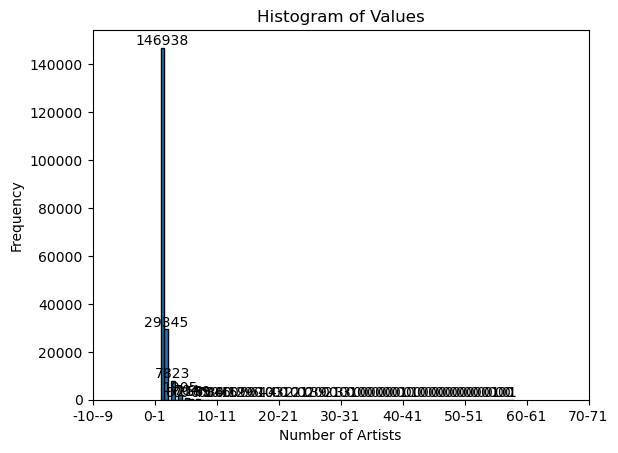

In [73]:
def count_items_in_list(lst):
    return len(lst)

# Apply the function to the DataFrame column
df_removed['artists_count'] = df_removed['artists'].apply(count_items_in_list)
ax = df_removed['artists_count'].plot(kind='hist', bins=100, edgecolor='black')

bin_labels = [f'{int(b)}-{int(b)+1}' for b in ax.get_xticks()]
plt.xticks(ax.get_xticks(), bin_labels)

# Add number labels on the bars
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1,
             str(int(i.get_height())), ha='center', va='bottom')

plt.title('Histogram of Values')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.show()

In [79]:
df_removed['artists_count'].describe()

# Giving a generous estimate of 3 Std away from mean as outlier:
mean = df_removed['artists_count'].mean()
std = df_removed['artists_count'].std()

upper = mean + (3 * std)
lower = mean - (3 * std)
print(upper.round())
print(lower.round())

4.0
-1.0


186011


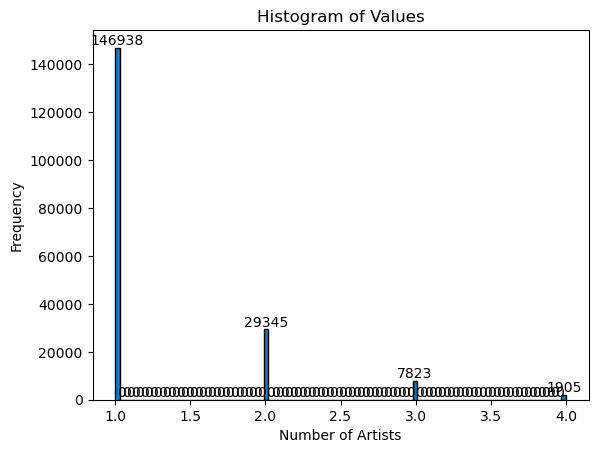

186011


In [87]:
print(df_removed['id'].count())
df_removed = df_removed[(df_removed['artists_count'] >= -1) & (df_removed['artists_count'] <= 4)]

ax = df_removed['artists_count'].plot(kind='hist', bins=100, edgecolor='black')

# Add number labels on the bars
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1,
             str(int(i.get_height())), ha='center', va='bottom')

plt.title('Histogram of Values')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.show()
print(df_removed['id'].count())

In [88]:
expanded_artists = df_removed['artists'].apply(lambda x: pd.Series(x))

# Rename the columns
expanded_artists.columns = [f"artist_{i+1}" for i in range(len(expanded_artists.columns))]

# Concatenate the expanded columns with the original DataFrame
df_merged = pd.concat([df_removed, expanded_artists], axis=1)
df_merged.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,time_signature,song_name_artist,year,first_artist,first_id_artists,artists_count,artist_1,artist_2,artist_3,artist_4
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,...,3,You'll Never Walk Alone - Mono; 2002 Remaster[...,2008,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8,1,Gerry & The Pacemakers,NaN,NaN,NaN
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,[The Toys],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,4,A Lover's Concerto['The Toys'],2020,The Toys,6lH5PpuiMa5SpfjoIOlwCS,1,The Toys,NaN,NaN,NaN
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,...,4,Ferry Cross the Mersey - Mono; 2002 Remaster['...,2008,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8,1,Gerry & The Pacemakers,NaN,NaN,NaN
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,...,4,Don't Let the Sun Catch You Crying (Main) - Mo...,2008,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8,1,Gerry & The Pacemakers,NaN,NaN,NaN
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,[Frank Sinatra],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,...,3,The September Of My Years - Live At The Sands ...,2018,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,1,Frank Sinatra,NaN,NaN,NaN


In [92]:
artist_dataset['artists'] = artist_dataset['name']
artist_genres = artist_dataset[["artists", "genres"]]

def string_to_list(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return []

for i in range(1, 5):  # Iterate over artist_1, artist_2, and artist_3
    # Merge genres for each artist column
    expanded_artists = pd.merge(expanded_artists, artist_genres, left_on=f'artist_{i}', right_on='artists', how='left')
    # Rename the genres column
    expanded_artists.rename(columns={'genres': f'genres_{i}'}, inplace=True)
    # Drop the redundant 'artists' column
    expanded_artists.drop('artists', axis=1, inplace=True)
    
expanded_artists.head()

In [255]:
expanded_artists['genres_1'] = expanded_artists['genres_1'].fillna('[]')
expanded_artists['genres_2'] = expanded_artists['genres_2'].fillna('[]')
expanded_artists['genres_3'] = expanded_artists['genres_3'].fillna('[]')

expanded_artists['genres_1'] = expanded_artists['genres_1'].apply(ast.literal_eval)
expanded_artists['genres_2'] = expanded_artists['genres_2'].apply(ast.literal_eval)
expanded_artists['genres_3'] = expanded_artists['genres_3'].apply(ast.literal_eval)
expanded_artists.head()

,artist_1,artist_2,artist_3,genres_1,genres_2,genres_3
0,Gerry & The Pacemakers,NaN,NaN,"[adult standards, brill building pop, british ...","[cascadian black metal, post-black metal]","[cascadian black metal, post-black metal]"
1,Gerry & The Pacemakers,NaN,NaN,"[adult standards, brill building pop, british ...","[cascadian black metal, post-black metal]",[]
2,Gerry & The Pacemakers,NaN,NaN,"[adult standards, brill building pop, british ...","[cascadian black metal, post-black metal]",[]
3,Gerry & The Pacemakers,NaN,NaN,"[adult standards, brill building pop, british ...",[],"[cascadian black metal, post-black metal]"
4,Gerry & The Pacemakers,NaN,NaN,"[adult standards, brill building pop, british ...",[],[]


In [256]:
expanded_artists['genres'] = expanded_artists['genres_1'] + expanded_artists['genres_2'] + expanded_artists['genres_3']

# Apply the function to each row to create a new column containing concatenated lists
expanded_artists.drop(['genres_1', 'genres_2', 'genres_3'], axis=1, inplace=True)

In [258]:
expanded_artists['genres'] = expanded_artists['genres'].apply(lambda x: list(set(x)))
expanded_artists.iloc[4789]['genres']

['latin pop', 'puerto rican pop', 'tropical', 'latin']

In [261]:
expanded_artists.iloc[9000:9005].head()

,artist_1,artist_2,artist_3,genres
9000,Amr Diab,NaN,NaN,"[arab pop, belly dance, egyptian pop, persian ..."
9001,David and the High Spirit,NaN,NaN,"[cascadian black metal, judaica, post-black me..."
9002,David and the High Spirit,NaN,NaN,"[cascadian black metal, judaica, post-black me..."
9003,David and the High Spirit,NaN,NaN,"[cascadian black metal, judaica, post-black me..."
9004,David and the High Spirit,NaN,NaN,"[cascadian black metal, judaica, post-black me..."


In [33]:
# Using Spotify API to search for a song's information based on input and adding the necessary information in a DataFrame.
def search_track(track_name):
    # Search for the track
    results = sp.search(q=track_name, type='track')

    # Check if the track exists
    if results['tracks']['total'] > 0:
        # Get the first track from the results
        track = results['tracks']['items'][0]
        explicit = int(track["explicit"] == True)
        print(f'Found track: {track["name"]} by {track["artists"][0]["name"]} from the album {track["album"]["name"]}.')
        track_dict = {"id": track["id"], "name": track["name"], "popularity": track["popularity"], 
                      "duration_ms": track["duration_ms"], "explicit": explicit, "artists": track["artists"][0]["name"],
                      "id_artists": track["artists"][0]["id"], "release_date": track["album"]["release_date"]}
        return track_dict
    else:
        print('Track not found')
        return None

# Creating a Single Row DataFrame for the input song.
track_result = search_track(input)
td = pd.DataFrame(track_result, index=[0])
td

Found track: Happy - From "Despicable Me 2" by Pharrell Williams from the album G I R L.


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date
0,60nZcImufyMA1MKQY3dcCH,"Happy - From ""Despicable Me 2""",83,232720,0,Pharrell Williams,2RdwBSPQiwcmiDo9kixcl8,2014-03-03


In [34]:
# Obtaining Feature Data from song based on its song_id from previous function and adding them to a DataFrame.
def get_audio_features(track_result):
    song_id = track_result["id"]
    results = sp.audio_features(song_id)

    if results:
        return results[0]
    else:
        print(f'No audio features found for song ID: {song_id}')
        return None

audio_features = get_audio_features(track_result)
af = pd.DataFrame(audio_features, index=[0])
# Taking out the irrevelant features.
af_formatted = af.drop(["type", "id", "uri", "track_href", "analysis_url", "duration_ms"], axis=1)
# Merging both DataFrames to sync up with the dataset's layout.
td = pd.concat([td, af_formatted], axis=1)
td['year'] = td['release_date'].str.extract(r'(\d{4})').astype(int)

In [35]:
td

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,60nZcImufyMA1MKQY3dcCH,"Happy - From ""Despicable Me 2""",83,232720,0,Pharrell Williams,2RdwBSPQiwcmiDo9kixcl8,2014-03-03,0.647,0.822,...,-4.662,0,0.183,0.219,0,0.0908,0.962,160.019,4,2014


In [36]:
# Adding the Input Song to the Dataset DataFrame. Added to the very front.
new_df = pd.concat([td, df_removed], ignore_index=True)
new_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,song_name_artist,first_artist
0,60nZcImufyMA1MKQY3dcCH,"Happy - From ""Despicable Me 2""",83,232720,0,Pharrell Williams,2RdwBSPQiwcmiDo9kixcl8,2014-03-03,0.647,0.822,...,0.1830,0.219,0.000000,0.0908,0.962,160.019,4,2014,NaN,NaN
1,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,...,0.0322,0.394,0.000000,0.1490,0.285,113.564,3,2008,You'll Never Walk Alone - Mono; 2002 Remaster[...,Gerry & The Pacemakers
2,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,0.0571,0.436,0.000000,0.1390,0.839,120.689,4,2020,A Lover's Concerto['The Toys'],The Toys
3,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,...,0.0289,0.255,0.000005,0.1630,0.588,104.536,4,2008,Ferry Cross the Mersey - Mono; 2002 Remaster['...,Gerry & The Pacemakers
4,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,...,0.0300,0.406,0.000000,0.1220,0.478,106.773,4,2008,Don't Let the Sun Catch You Crying (Main) - Mo...,Gerry & The Pacemakers


In [ ]:
# Recalibrating the Index.
# new_df = new_df.reset_index(drop=True)
# new_df.head()

# Checking loudness values.
new_df["loudness"].describe()

In [39]:
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Feature selection, removing non-useful rows.
def processing(new_df):
    df2 = new_df.drop(['id', 'name', 'id_artists', 'release_date', 'popularity', 'mode', "song_name_artist", "first_artist"], axis=1)
    
    # Normalize numerical features
    numerical_features = ['duration_ms', 'loudness', 'tempo']
    scaler = MinMaxScaler()
    df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
    
    # Standardise Year
    df2['standardized_year'] = scaler.fit_transform(df2[['year']])
    df2 = df2.drop(['year'], axis=1)

    # Create a feature matrix
    feature_matrix = df2.drop(['artists'], axis=1)
    # This is the input song. We are isolating it from the dataframe first.
    input = feature_matrix.iloc[0].T
    # This is the rest of the songs.
    feature_matrix = feature_matrix.iloc[1:]

    # Apply cosine similarity
    start = 0
    end = 1000
    arr = []
    
    # Returns comparison value of first song in dataset to all others in an array.
    # DataFrame can be customised before Feature Selection to change which song the subject of comparison should be.
    while end < feature_matrix['explicit'].count():
        # Compile the nth 1,000 songs in the dataframe.
        set = feature_matrix.iloc[start:end].T
        # Add the input song to the top of the dataframe.
        compare_df = pd.concat([input, set], axis=1).T
        # Perform cosine similarity.
        cosine_sim = cosine_similarity(compare_df) # Comparing bit by bit to prevent too many dimensions.
        cs_list = cosine_sim[0].tolist() # Taking only the first row a.k.a the comparison between the first song and all others.
        arr += cs_list
        # Prepare for the next 1,000 songs.
        start = end
        end += 1000
    return arr
arr = processing(new_df)
arr

[0.9999999999999999,
 0.6525265611104685,
 0.9084751824076449,
 0.9879462676092698,
 0.8087531894529795,
 0.9430148855184333,
 0.9412334935566744,
 0.9615706286473802,
 0.9923207344145936,
 0.8024436889854777,
 0.9871082837138204,
 0.983386258787109,
 0.9761690812608509,
 0.9403961289526743,
 0.9889007104819354,
 0.6417051645099937,
 0.9030590734199506,
 0.7889571697988271,
 0.9793690167594965,
 0.985424787048872,
 0.9750355013079949,
 0.9402463577891349,
 0.8656008464157107,
 0.9595407166482552,
 0.9832815028547772,
 0.9122817502253283,
 0.9565011029917074,
 0.9026043319006875,
 0.8895647581350764,
 0.82118333119544,
 0.982336162816943,
 0.8445132333110358,
 0.9447808074037539,
 0.9488018928546583,
 0.9108786149446308,
 0.9242450281807452,
 0.9573938566995698,
 0.9878106380031573,
 0.9932728411684973,
 0.6563031464269826,
 0.9811518605948427,
 0.9922826073048451,
 0.9780782664094231,
 0.9559376183787732,
 0.9604769587358255,
 0.9120907663725812,
 0.9942487998101026,
 0.809579044891721

In [40]:
max(arr[1:])

0.9999999999999999

In [41]:
def compile_suggestions(arr):
    suggestions = []
    
    # Compiling all song ids that are above the pre-determined threshold for 'like the first song'.
    for i in range(len(arr)):
        if arr[i] > 0.995:
            suggestions.append(i)
    
    print(suggestions)
    return suggestions
suggestions = compile_suggestions(arr)

[0, 63, 120, 147, 275, 496, 556, 622, 630, 798, 1001, 1379, 1522, 1540, 1548, 1559, 1619, 1621, 1629, 1800, 2002, 2257, 2302, 2483, 2485, 2660, 2926, 2963, 2966, 2989, 2998, 3003, 3042, 3157, 3207, 3213, 3326, 3444, 3455, 3498, 3515, 3544, 3587, 3705, 3801, 3810, 3816, 3824, 3872, 3961, 3999, 4004, 4012, 4156, 4208, 4214, 4238, 4307, 4309, 4351, 4540, 4667, 4716, 4719, 4724, 4805, 4837, 4895, 4937, 5005, 5172, 5207, 5209, 5227, 5305, 5316, 5413, 5419, 5440, 5533, 5611, 5648, 5654, 5677, 5683, 5720, 5764, 5787, 5814, 5832, 5833, 5917, 5933, 5966, 6006, 6034, 6052, 6084, 6190, 6266, 6540, 6611, 6642, 6714, 6734, 6742, 6764, 6772, 6785, 6793, 6807, 6882, 6944, 6956, 6961, 6967, 6988, 7001, 7007, 7059, 7076, 7126, 7146, 7229, 7360, 7425, 7436, 7507, 7513, 7563, 7566, 7609, 7627, 7664, 7810, 7813, 7839, 7932, 7946, 8008, 8069, 8149, 8322, 8323, 8362, 8416, 8455, 8461, 8492, 8512, 8594, 8606, 8633, 8681, 8696, 8760, 8833, 8888, 8917, 8918, 9009, 9032, 9114, 9123, 9164, 9236, 9266, 9274, 9305

In [42]:
# Extracting out the end result information.
def format_suggestions(suggestions):
    # first = suggestions[1]

    # Creating the new dataframe with the first matched song.
#     main = df_removed.iloc[suggestions].copy()
#     df_main = pd.DataFrame(main)
#     df_main = df_main.T
#    print(df_removed.tail())
    df_main = new_df.loc[suggestions]

    # Adding the rest of the matched songs to the dataframe.
#     for n in range (2, len(suggestions)):
#         temp = df_removed.iloc[suggestions[n],:6].copy()
#         df_temp = pd.DataFrame(temp)
#         df_temp = df_temp.T
#         df_main = pd.concat([df_main, df_temp])

#     df_main = df_main.drop(['popularity', 'duration_ms', 'explicit'], axis=1)
    return df_main

df_main = format_suggestions(suggestions).iloc[1:]
df_main.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,song_name_artist,first_artist
63,0QskAWrO8cRDtSho6pb4zq,It's Happened to Me - 2002 Remaster,9,140213,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.520,0.636,...,0.0297,0.683,0.000000,0.1450,0.902,145.847,4,2008,It's Happened to Me - 2002 Remaster['Gerry & T...,Gerry & The Pacemakers
120,1Jwe1VZpsaSDt6BHVdsJbH,Hard Hard Year - Saturday Club 28th June 1966,1,132053,0,['The Hollies'],['6waa8mKu91GjzD4NlONlNJ'],2012-05-07,0.362,0.515,...,0.0319,0.244,0.000415,0.0901,0.599,176.380,3,2012,Hard Hard Year - Saturday Club 28th June 1966[...,The Hollies
147,2RvDHSvKghCX03v6w80gBb,Good Lovin',3,200760,0,['Mary Wells'],['1cjZk1xXn3YCToNg3uJpA7'],2020-03-13,0.553,0.570,...,0.0618,0.356,0.000000,0.4120,0.699,153.547,4,2020,Good Lovin'['Mary Wells'],Mary Wells
275,3T20cXU9sWa7u4gl1ZSgQV,Open up Your Heart,0,144560,0,['Bill Anderson'],['0gWNSMYCSHF4wxIs1XTSDh'],2011-06-13,0.699,0.476,...,0.0260,0.457,0.000000,0.3360,0.966,94.228,4,2011,Open up Your Heart['Bill Anderson'],Bill Anderson
496,37USGvYvSBqi0nR0l1bx4H,3000 NENNI ICHIDONO HAPPINESS - THE HAPPINESS ...,0,289160,0,['Sayla'],['7DtqyU3AJlOeke1IZnHoc6'],2018-01-02,0.555,0.896,...,0.0494,0.280,0.000000,0.1290,0.502,127.968,4,2018,3000 NENNI ICHIDONO HAPPINESS - THE HAPPINESS ...,Sayla


In [ ]:
# Standardising and Weighting Years.
# from sklearn.preprocessing import StandardScaler
# def weighting(df_main): 
#     df_main['year'] = pd.to_numeric(df_main['year'])
#     scaler = StandardScaler()
#     df_main['standardized_year'] = scaler.fit_transform(df_main[['year']])
#     year_compare = df_main['standardized_year'].loc[0]
#     df_main = df_main.drop
#     return df_main
# df_final = weighting(df_main)
# df_final.head()

In [ ]:
df_main.count() # There is one less for the last 3 features as the input song did not go through the extracted year's steps.
# df_final['standardized_year'].describe()

In [43]:
import random

# Generating 10 of the matched songs at random.
def recommend(df_main):
    print('Here are your recommendations!')
    for c in range(10):
        recc = df_main.sample().to_dict()
        name = list(recc['name'].values())[0]
        artists = (list(recc['artists'].values())[0])[1:len(list(recc['artists'].values())[0])-1]
        year = str(list(recc['year'].values())[0])
        print(str(c + 1) + '. ' + name + ' by ' + artists + 'published in ' + year)
        df_main = df_main.drop(list(recc['id'])[0])
    
# May want to try a filter for repreventing duplicate songs in the list.
recommend(df_main) # End Product

Here are your recommendations!
1. Knock Yourself Out - Live by 'Tower Of Power'published in 2021
2. Tatu by 'Woro Widowati'published in 2020
3. Fuego En Tu Piel - Duranguense by 'Los Primos MX'published in 2008
4. Tu Foto Del DNI by 'Marmi', 'Aitana'published in 2020
5. La niña fresa by 'Banda Zeta'published in 2007
6. Mi amor by 'Mattyas'published in 2011
7. Como Puede Ser by 'Andrés Cepeda'published in 2007
8. Call Me Out by 'Sea Girls'published in 2017
9. The Light Cone - 2012 Remaster by 'Edgar Froese'published in 2012
10. Todo Me Recuerda a Ti by 'La Nueva Luna'published in 2008
